# Seção 1: Importação das bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.12.0'

# Seção 2: Importação da base de dados

In [ ]:
df_alexa = pd.read_csv("/content/amazon-alexa.tsv", sep="\t")

In [ ]:
df_alexa

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# Seção 3: Visualização dos dados

In [ ]:
positive = df_alexa[df_alexa["feedback"] == 1]
negative = df_alexa[df_alexa["feedback"] == 0]

In [ ]:
df_alexa["feedback"].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

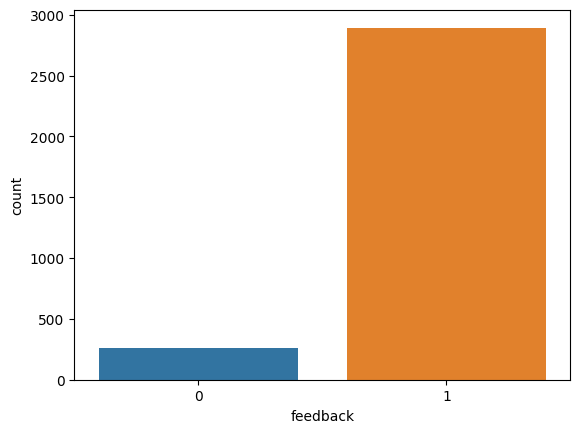

In [ ]:
sns.countplot(x=df_alexa["feedback"], label="Count");

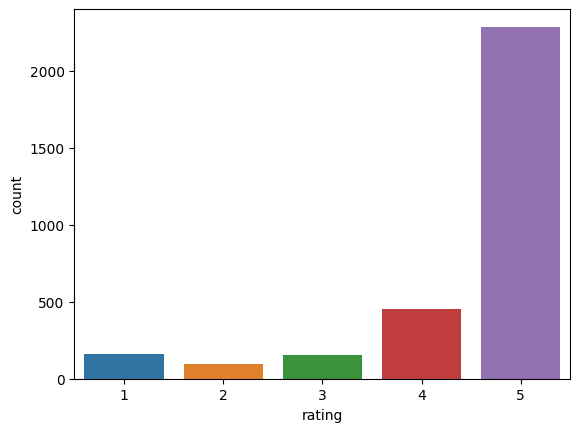

In [ ]:
sns.countplot(x=df_alexa["rating"]);

# Seção 4: Limpeza de dados

In [ ]:
df_alexa.drop(['date', 'rating'], axis=1, inplace=True)

In [ ]:
variation_dummies = pd.get_dummies(df_alexa["variation"])

In [ ]:
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_alexa.drop(['variation'], axis=1, inplace=True)
df_alexa = pd.concat([df_alexa, variation_dummies], axis=1)

# Exemplo de tokenização

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [ ]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

# Seção 5: Tokenização da base da dados

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa["verified_reviews"])

In [ ]:
alexa_countvectorizer.shape

(3150, 4044)

In [ ]:
type(alexa_countvectorizer)

scipy.sparse._csr.csr_matrix

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '07', ..., 'zzzz', 'zzzzzzz', 'útil'], dtype=object)

In [ ]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [ ]:
df_alexa.drop(['verified_reviews'], axis=1, inplace=True)
df_alexa = pd.concat([df_alexa, reviews], axis=1)

In [ ]:
df_alexa

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df_alexa.drop("feedback", axis=1)
y = df_alexa["feedback"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
x_train.shape, y_train.shape

((2520, 4060), (2520,))

In [ ]:
x_test.shape, y_test.shape

((630, 4060), (630,))

# Seção 6: Construção e treinamento do modelo

In [ ]:
# 4060 -> 400 -> 400 -> 1
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060,)))
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 400)               1624400   
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
epochs_hist = classifier.fit(x_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 2s 11ms/step - loss: 0.2814 - accuracy: 0.9155
Epoch 2/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0866 - accuracy: 0.9619
Epoch 3/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0318 - accuracy: 0.9905
Epoch 4/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 5/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0178 - accuracy: 0.9940
Epoch 6/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0167 - accuracy: 0.9937
Epoch 7/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 8/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0150 - accuracy: 0.9933
Epoch 9/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0163 - accuracy: 0.9929
Epoch 10/10
79/79 [==============================] - 1s 10ms/step - loss: 0.0158 - accuracy: 0.9948


# Seção 7: Avaliação do modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_train = classifier.predict(x_train)
y_pred_train

79/79 [==============================] - 0s 3ms/step


array([[1.        ],
       [0.9999925 ],
       [1.        ],
       ...,
       [1.        ],
       [0.9996224 ],
       [0.99998695]], dtype=float32)

In [ ]:
y_pred_train = (y_pred_train > 0.5)
y_pred_train

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[ 188,   10],
       [   3, 2319]])

In [ ]:
y_predict = classifier.predict(x_test)
y_predict = (y_predict > 0.5)

20/20 [==============================] - 0s 5ms/step


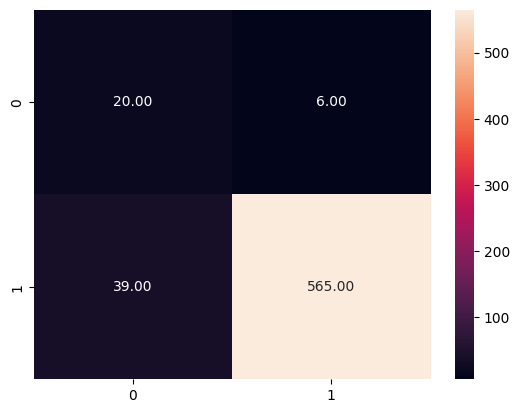

In [ ]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot=True, fmt=".2f");

In [1]:
39/565

0.06902654867256637